# PCA: Manual Step-by-Step Implementation

This notebook provides a detailed, manual implementation of Principal Component Analysis (PCA) using a small dataset (10 rows, 2 columns) to understand every single calculation step without relying on libraries. Then we'll compare with scikit-learn.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('seaborn-v0_8')

## Step 1: Create Simple Dataset (10 rows, 2 columns)

We'll create a small, correlated dataset where we can manually verify every calculation.

In [12]:
# Create a simple 10x2 dataset manually for easy calculation
X = np.array([
    [1, 2],
    [2, 3],
    [3, 5],
    [4, 4],
    [5, 6],
    [6, 7],
    [7, 8],
    [8, 9],
    [9, 11],
    [10, 12]
], dtype=float)

print("Original Dataset (X):")
print("Shape:", X.shape)
print("Data:")
for i, row in enumerate(X):
    print(f"Sample {i+1:2d}: [{row[0]:4.1f}, {row[1]:4.1f}]")

print(f"\nFeature 1: {X[:, 0]}")
print(f"Feature 2: {X[:, 1]}")

Original Dataset (X):
Shape: (10, 2)
Data:
Sample  1: [ 1.0,  2.0]
Sample  2: [ 2.0,  3.0]
Sample  3: [ 3.0,  5.0]
Sample  4: [ 4.0,  4.0]
Sample  5: [ 5.0,  6.0]
Sample  6: [ 6.0,  7.0]
Sample  7: [ 7.0,  8.0]
Sample  8: [ 8.0,  9.0]
Sample  9: [ 9.0, 11.0]
Sample 10: [10.0, 12.0]

Feature 1: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Feature 2: [ 2.  3.  5.  4.  6.  7.  8.  9. 11. 12.]


## Step 2: Calculate Mean (Center of Data) - MANUALLY

PCA requires centering the data by subtracting the mean. Let's calculate this step by step.

In [13]:
# Manual calculation of mean for each feature
print("STEP 2: CALCULATE MEANS (Manual Calculation)")
print("=" * 50)

# Feature 1 mean
feature1_values = X[:, 0]
print(f"Feature 1 values: {feature1_values}")
print(f"Sum of Feature 1: {feature1_values.sum():.1f}")
print(f"Number of samples: {len(feature1_values)}")
mean1 = feature1_values.sum() / len(feature1_values)
print(f"Mean of Feature 1: {feature1_values.sum():.1f} / {len(feature1_values)} = {mean1:.2f}")

print()

# Feature 2 mean
feature2_values = X[:, 1]
print(f"Feature 2 values: {feature2_values}")
print(f"Sum of Feature 2: {feature2_values.sum():.1f}")
print(f"Number of samples: {len(feature2_values)}")
mean2 = feature2_values.sum() / len(feature2_values)
print(f"Mean of Feature 2: {feature2_values.sum():.1f} / {len(feature2_values)} = {mean2:.2f}")

# Store means
means_manual = np.array([mean1, mean2])
print(f"\nMeans vector: [{mean1:.2f}, {mean2:.2f}]")

# Verify with numpy
means_numpy = np.mean(X, axis=0)
print(f"NumPy verification: {means_numpy}")
print(f"Match: {np.allclose(means_manual, means_numpy)}")

STEP 2: CALCULATE MEANS (Manual Calculation)
Feature 1 values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Sum of Feature 1: 55.0
Number of samples: 10
Mean of Feature 1: 55.0 / 10 = 5.50

Feature 2 values: [ 2.  3.  5.  4.  6.  7.  8.  9. 11. 12.]
Sum of Feature 2: 67.0
Number of samples: 10
Mean of Feature 2: 67.0 / 10 = 6.70

Means vector: [5.50, 6.70]
NumPy verification: [5.5 6.7]
Match: True


## Step 3: Center the Data

Subtract the mean from each data point to center the data around the origin.

In [14]:
print("STEP 3: CENTER THE DATA (Manual Calculation)")
print("=" * 50)

print("Original data - Mean = Centered data")
print("Mean to subtract:", means_manual)
print()

# Manual centering calculation
X_centered_manual = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X_centered_manual[i, j] = X[i, j] - means_manual[j]
    print(f"Sample {i+1:2d}: [{X[i,0]:4.1f}, {X[i,1]:4.1f}] - [{means_manual[0]:4.2f}, {means_manual[1]:4.2f}] = [{X_centered_manual[i,0]:6.2f}, {X_centered_manual[i,1]:6.2f}]")

print(f"\nCentered Data Matrix:")
print(X_centered_manual)

# Verify means of centered data should be ~0
centered_means = np.mean(X_centered_manual, axis=0)
print(f"\nMean of centered data: {centered_means}")
print(f"(Should be very close to zero)")

STEP 3: CENTER THE DATA (Manual Calculation)
Original data - Mean = Centered data
Mean to subtract: [5.5 6.7]

Sample  1: [ 1.0,  2.0] - [5.50, 6.70] = [ -4.50,  -4.70]
Sample  2: [ 2.0,  3.0] - [5.50, 6.70] = [ -3.50,  -3.70]
Sample  3: [ 3.0,  5.0] - [5.50, 6.70] = [ -2.50,  -1.70]
Sample  4: [ 4.0,  4.0] - [5.50, 6.70] = [ -1.50,  -2.70]
Sample  5: [ 5.0,  6.0] - [5.50, 6.70] = [ -0.50,  -0.70]
Sample  6: [ 6.0,  7.0] - [5.50, 6.70] = [  0.50,   0.30]
Sample  7: [ 7.0,  8.0] - [5.50, 6.70] = [  1.50,   1.30]
Sample  8: [ 8.0,  9.0] - [5.50, 6.70] = [  2.50,   2.30]
Sample  9: [ 9.0, 11.0] - [5.50, 6.70] = [  3.50,   4.30]
Sample 10: [10.0, 12.0] - [5.50, 6.70] = [  4.50,   5.30]

Centered Data Matrix:
[[-4.5 -4.7]
 [-3.5 -3.7]
 [-2.5 -1.7]
 [-1.5 -2.7]
 [-0.5 -0.7]
 [ 0.5  0.3]
 [ 1.5  1.3]
 [ 2.5  2.3]
 [ 3.5  4.3]
 [ 4.5  5.3]]

Mean of centered data: [0.00000000e+00 1.77635684e-16]
(Should be very close to zero)


## Step 4: Calculate Covariance Matrix

The covariance matrix shows how features vary together. Formula: C = (1/(n-1)) * X^T * X

In [15]:
print("STEP 4: CALCULATE COVARIANCE MATRIX (Manual Calculation)")
print("=" * 60)

n_samples, n_features = X_centered_manual.shape
print(f"Centered data shape: {n_samples} samples × {n_features} features")
print(f"Formula: C = (1/(n-1)) * X^T * X")
print(f"Where n-1 = {n_samples-1} (degrees of freedom)")

print(f"\nCentered data matrix (X):")
for i, row in enumerate(X_centered_manual):
    print(f"[{row[0]:6.2f}, {row[1]:6.2f}]")

# Calculate X^T (transpose)
print(f"\nX^T (transpose):")
X_T = X_centered_manual.T
for i, row in enumerate(X_T):
    print(f"Feature {i+1}: [{', '.join([f'{val:6.2f}' for val in row])}]")

print(f"\nX^T * X calculation:")
# Manual matrix multiplication X^T * X
XTX = np.zeros((2, 2))

# Element [0,0]: dot product of row 0 of X^T with column 0 of X
XTX[0, 0] = sum(X_T[0, i] * X_centered_manual[i, 0] for i in range(n_samples))
print(f"XTX[0,0] = Σ(X_T[0,i] * X[i,0]) = {XTX[0, 0]:.4f}")

# Element [0,1]: dot product of row 0 of X^T with column 1 of X  
XTX[0, 1] = sum(X_T[0, i] * X_centered_manual[i, 1] for i in range(n_samples))
print(f"XTX[0,1] = Σ(X_T[0,i] * X[i,1]) = {XTX[0, 1]:.4f}")

# Element [1,0]: dot product of row 1 of X^T with column 0 of X
XTX[1, 0] = sum(X_T[1, i] * X_centered_manual[i, 0] for i in range(n_samples))
print(f"XTX[1,0] = Σ(X_T[1,i] * X[i,0]) = {XTX[1, 0]:.4f}")

# Element [1,1]: dot product of row 1 of X^T with column 1 of X
XTX[1, 1] = sum(X_T[1, i] * X_centered_manual[i, 1] for i in range(n_samples))
print(f"XTX[1,1] = Σ(X_T[1,i] * X[i,1]) = {XTX[1, 1]:.4f}")

print(f"\nX^T * X matrix:")
print(XTX)

# Covariance matrix = (1/(n-1)) * X^T * X
cov_matrix_manual = XTX / (n_samples - 1)

print(f"\nCovariance Matrix = (1/{n_samples-1}) * X^T * X:")
print(f"C[0,0] = {XTX[0,0]:.4f} / {n_samples-1} = {cov_matrix_manual[0,0]:.6f} (Variance of Feature 1)")
print(f"C[0,1] = {XTX[0,1]:.4f} / {n_samples-1} = {cov_matrix_manual[0,1]:.6f} (Covariance between features)")
print(f"C[1,0] = {XTX[1,0]:.4f} / {n_samples-1} = {cov_matrix_manual[1,0]:.6f} (Covariance between features)")
print(f"C[1,1] = {XTX[1,1]:.4f} / {n_samples-1} = {cov_matrix_manual[1,1]:.6f} (Variance of Feature 2)")

print(f"\nFinal Covariance Matrix:")
print(cov_matrix_manual)

# Verify with numpy
cov_matrix_numpy = np.cov(X_centered_manual.T)
print(f"\nNumPy verification:")
print(cov_matrix_numpy)
print(f"Match: {np.allclose(cov_matrix_manual, cov_matrix_numpy)}")

STEP 4: CALCULATE COVARIANCE MATRIX (Manual Calculation)
Centered data shape: 10 samples × 2 features
Formula: C = (1/(n-1)) * X^T * X
Where n-1 = 9 (degrees of freedom)

Centered data matrix (X):
[ -4.50,  -4.70]
[ -3.50,  -3.70]
[ -2.50,  -1.70]
[ -1.50,  -2.70]
[ -0.50,  -0.70]
[  0.50,   0.30]
[  1.50,   1.30]
[  2.50,   2.30]
[  3.50,   4.30]
[  4.50,   5.30]

X^T (transpose):
Feature 1: [ -4.50,  -3.50,  -2.50,  -1.50,  -0.50,   0.50,   1.50,   2.50,   3.50,   4.50]
Feature 2: [ -4.70,  -3.70,  -1.70,  -2.70,  -0.70,   0.30,   1.30,   2.30,   4.30,   5.30]

X^T * X calculation:
XTX[0,0] = Σ(X_T[0,i] * X[i,0]) = 82.5000
XTX[0,1] = Σ(X_T[0,i] * X[i,1]) = 89.5000
XTX[1,0] = Σ(X_T[1,i] * X[i,0]) = 89.5000
XTX[1,1] = Σ(X_T[1,i] * X[i,1]) = 100.1000

X^T * X matrix:
[[ 82.5  89.5]
 [ 89.5 100.1]]

Covariance Matrix = (1/9) * X^T * X:
C[0,0] = 82.5000 / 9 = 9.166667 (Variance of Feature 1)
C[0,1] = 89.5000 / 9 = 9.944444 (Covariance between features)
C[1,0] = 89.5000 / 9 = 9.944444 (Cov

## Step 5: Calculate Eigenvalues and Eigenvectors

For a 2x2 matrix, we can solve the characteristic equation manually.

In [16]:
print("STEP 5: CALCULATE EIGENVALUES AND EIGENVECTORS (Manual Calculation)")
print("=" * 70)

# Extract covariance matrix elements for easier calculation
a = cov_matrix_manual[0, 0]  # C[0,0]
b = cov_matrix_manual[0, 1]  # C[0,1] = C[1,0]
c = cov_matrix_manual[1, 0]  # C[1,0] = C[0,1] 
d = cov_matrix_manual[1, 1]  # C[1,1]

print(f"Covariance Matrix:")
print(f"[{a:8.6f}  {b:8.6f}]")
print(f"[{c:8.6f}  {d:8.6f}]")

print(f"\nFor a 2x2 matrix [[a,b],[c,d]], eigenvalues are solutions to:")
print(f"det(C - λI) = 0")
print(f"(a-λ)(d-λ) - bc = 0")
print(f"λ² - (a+d)λ + (ad-bc) = 0")

# Calculate coefficients of characteristic polynomial
trace = a + d  # sum of diagonal elements
determinant = a * d - b * c

print(f"\nCoefficients:")
print(f"trace (a+d) = {a:.6f} + {d:.6f} = {trace:.6f}")
print(f"determinant (ad-bc) = ({a:.6f})({d:.6f}) - ({b:.6f})({c:.6f}) = {determinant:.6f}")

print(f"\nCharacteristic equation: λ² - {trace:.6f}λ + {determinant:.6f} = 0")

# Solve quadratic equation: λ = (trace ± sqrt(trace² - 4*determinant)) / 2
discriminant = trace**2 - 4 * determinant
print(f"\nDiscriminant = {trace:.6f}² - 4({determinant:.6f}) = {discriminant:.6f}")

lambda1 = (trace + np.sqrt(discriminant)) / 2
lambda2 = (trace - np.sqrt(discriminant)) / 2

print(f"\nEigenvalues:")
print(f"λ₁ = ({trace:.6f} + √{discriminant:.6f}) / 2 = {lambda1:.8f}")
print(f"λ₂ = ({trace:.6f} - √{discriminant:.6f}) / 2 = {lambda2:.8f}")

eigenvalues_manual = np.array([lambda1, lambda2])

print(f"\nNow calculate eigenvectors for each eigenvalue...")
print(f"For eigenvalue λ, solve: (C - λI)v = 0")

# Eigenvector for λ₁
print(f"\nFor λ₁ = {lambda1:.8f}:")
matrix1 = cov_matrix_manual - lambda1 * np.eye(2)
print(f"C - λ₁I = ")
print(f"[{matrix1[0,0]:10.8f}  {matrix1[0,1]:10.8f}]")
print(f"[{matrix1[1,0]:10.8f}  {matrix1[1,1]:10.8f}]")

# For eigenvector [x, y], we have: matrix1[0,0]*x + matrix1[0,1]*y = 0
# So: y = -matrix1[0,0]*x / matrix1[0,1] (if matrix1[0,1] != 0)
if abs(matrix1[0,1]) > 1e-10:
    # Choose x = 1, then y = -matrix1[0,0]/matrix1[0,1]
    v1_x = 1.0
    v1_y = -matrix1[0,0] / matrix1[0,1]
    eigenvector1_unnormalized = np.array([v1_x, v1_y])
    print(f"Setting x=1: y = -{matrix1[0,0]:.8f} / {matrix1[0,1]:.8f} = {v1_y:.8f}")
    print(f"Unnormalized eigenvector 1: [{v1_x:.8f}, {v1_y:.8f}]")
else:
    eigenvector1_unnormalized = np.array([0.0, 1.0])

# Normalize eigenvector
eigenvector1 = eigenvector1_unnormalized / np.linalg.norm(eigenvector1_unnormalized)
print(f"Normalized eigenvector 1: [{eigenvector1[0]:.8f}, {eigenvector1[1]:.8f}]")

# Eigenvector for λ₂
print(f"\nFor λ₂ = {lambda2:.8f}:")
matrix2 = cov_matrix_manual - lambda2 * np.eye(2)
print(f"C - λ₂I = ")
print(f"[{matrix2[0,0]:10.8f}  {matrix2[0,1]:10.8f}]")
print(f"[{matrix2[1,0]:10.8f}  {matrix2[1,1]:10.8f}]")

if abs(matrix2[0,1]) > 1e-10:
    v2_x = 1.0
    v2_y = -matrix2[0,0] / matrix2[0,1]
    eigenvector2_unnormalized = np.array([v2_x, v2_y])
    print(f"Setting x=1: y = -{matrix2[0,0]:.8f} / {matrix2[0,1]:.8f} = {v2_y:.8f}")
    print(f"Unnormalized eigenvector 2: [{v2_x:.8f}, {v2_y:.8f}]")
else:
    eigenvector2_unnormalized = np.array([1.0, 0.0])

eigenvector2 = eigenvector2_unnormalized / np.linalg.norm(eigenvector2_unnormalized)
print(f"Normalized eigenvector 2: [{eigenvector2[0]:.8f}, {eigenvector2[1]:.8f}]")

eigenvectors_manual = np.column_stack([eigenvector1, eigenvector2])

print(f"\n=== MANUAL RESULTS ====")
print(f"Eigenvalues:  [{eigenvalues_manual[0]:.8f}, {eigenvalues_manual[1]:.8f}]")
print(f"Eigenvectors:")
print(eigenvectors_manual)

# Verify with numpy
eigenvalues_numpy, eigenvectors_numpy = np.linalg.eig(cov_matrix_manual)
print(f"\n=== NUMPY VERIFICATION ===")
print(f"Eigenvalues:  {eigenvalues_numpy}")
print(f"Eigenvectors:")
print(eigenvectors_numpy)

print(f"\nEigenvalues match: {np.allclose(np.sort(eigenvalues_manual), np.sort(eigenvalues_numpy))}")
print(f"Eigenvectors match (absolute values): {np.allclose(np.abs(eigenvectors_manual), np.abs(eigenvectors_numpy), atol=1e-6)}")

STEP 5: CALCULATE EIGENVALUES AND EIGENVECTORS (Manual Calculation)
Covariance Matrix:
[9.166667  9.944444]
[9.944444  11.122222]

For a 2x2 matrix [[a,b],[c,d]], eigenvalues are solutions to:
det(C - λI) = 0
(a-λ)(d-λ) - bc = 0
λ² - (a+d)λ + (ad-bc) = 0

Coefficients:
trace (a+d) = 9.166667 + 11.122222 = 20.288889
determinant (ad-bc) = (9.166667)(11.122222) - (9.944444)(9.944444) = 3.061728

Characteristic equation: λ² - 20.288889λ + 3.061728 = 0

Discriminant = 20.288889² - 4(3.061728) = 399.392099

Eigenvalues:
λ₁ = (20.288889 + √399.392099) / 2 = 20.13684279
λ₂ = (20.288889 - √399.392099) / 2 = 0.15204610

Now calculate eigenvectors for each eigenvalue...
For eigenvalue λ, solve: (C - λI)v = 0

For λ₁ = 20.13684279:
C - λ₁I = 
[-10.97017612  9.94444444]
[9.94444444  -9.01462057]
Setting x=1: y = --10.97017612 / 9.94444444 = 1.10314620
Unnormalized eigenvector 1: [1.00000000, 1.10314620]
Normalized eigenvector 1: [0.67162037, 0.74089546]

For λ₂ = 0.15204610:
C - λ₂I = 
[9.01462057 

## Step 6: Sort by Eigenvalues (Principal Components)

Sort eigenvalues and eigenvectors in descending order of eigenvalues.

In [17]:
print("STEP 6: SORT EIGENVALUES AND EIGENVECTORS")
print("=" * 50)

print(f"Before sorting:")
print(f"λ₁ = {eigenvalues_manual[0]:.8f}, eigenvector₁ = [{eigenvectors_manual[0,0]:.8f}, {eigenvectors_manual[1,0]:.8f}]")
print(f"λ₂ = {eigenvalues_manual[1]:.8f}, eigenvector₂ = [{eigenvectors_manual[0,1]:.8f}, {eigenvectors_manual[1,1]:.8f}]")

# Sort by eigenvalues in descending order
idx = np.argsort(eigenvalues_manual)[::-1]
eigenvalues_sorted = eigenvalues_manual[idx]
eigenvectors_sorted = eigenvectors_manual[:, idx]

print(f"\nSorting indices: {idx}")
print(f"After sorting (descending order):")
print(f"PC₁: λ = {eigenvalues_sorted[0]:.8f}, eigenvector = [{eigenvectors_sorted[0,0]:.8f}, {eigenvectors_sorted[1,0]:.8f}]")
print(f"PC₂: λ = {eigenvalues_sorted[1]:.8f}, eigenvector = [{eigenvectors_sorted[0,1]:.8f}, {eigenvectors_sorted[1,1]:.8f}]")

# Calculate explained variance ratio
total_variance = np.sum(eigenvalues_sorted)
explained_variance_ratio = eigenvalues_sorted / total_variance

print(f"\nVariance Explained:")
print(f"Total variance = {eigenvalues_sorted[0]:.6f} + {eigenvalues_sorted[1]:.6f} = {total_variance:.6f}")
print(f"PC₁ explains: {eigenvalues_sorted[0]:.6f} / {total_variance:.6f} = {explained_variance_ratio[0]:.4f} = {explained_variance_ratio[0]*100:.2f}%")
print(f"PC₂ explains: {eigenvalues_sorted[1]:.6f} / {total_variance:.6f} = {explained_variance_ratio[1]:.4f} = {explained_variance_ratio[1]*100:.2f}%")

print(f"\n=== PRINCIPAL COMPONENTS ====")
print(f"PC₁ (1st Principal Component): [{eigenvectors_sorted[0,0]:.8f}, {eigenvectors_sorted[1,0]:.8f}]")
print(f"PC₂ (2nd Principal Component): [{eigenvectors_sorted[0,1]:.8f}, {eigenvectors_sorted[1,1]:.8f}]")

STEP 6: SORT EIGENVALUES AND EIGENVECTORS
Before sorting:
λ₁ = 20.13684279, eigenvector₁ = [0.67162037, 0.74089546]
λ₂ = 0.15204610, eigenvector₂ = [0.74089546, -0.67162037]

Sorting indices: [0 1]
After sorting (descending order):
PC₁: λ = 20.13684279, eigenvector = [0.67162037, 0.74089546]
PC₂: λ = 0.15204610, eigenvector = [0.74089546, -0.67162037]

Variance Explained:
Total variance = 20.136843 + 0.152046 = 20.288889
PC₁ explains: 20.136843 / 20.288889 = 0.9925 = 99.25%
PC₂ explains: 0.152046 / 20.288889 = 0.0075 = 0.75%

=== PRINCIPAL COMPONENTS ====
PC₁ (1st Principal Component): [0.67162037, 0.74089546]
PC₂ (2nd Principal Component): [0.74089546, -0.67162037]


## Step 7: Transform Data to Principal Component Space

Project the centered data onto the principal components.

In [18]:
print("STEP 7: TRANSFORM DATA TO PRINCIPAL COMPONENT SPACE")
print("=" * 60)

print(f"Formula: Y = X_centered * P")
print(f"Where P is the matrix of principal components (eigenvectors)")

print(f"\nCentered data (X_centered):")
for i, row in enumerate(X_centered_manual):
    print(f"Sample {i+1:2d}: [{row[0]:7.2f}, {row[1]:7.2f}]")

print(f"\nPrincipal components matrix (P):")
print(f"PC₁: [{eigenvectors_sorted[0,0]:8.6f}, {eigenvectors_sorted[1,0]:8.6f}]")
print(f"PC₂: [{eigenvectors_sorted[0,1]:8.6f}, {eigenvectors_sorted[1,1]:8.6f}]")
print(f"P = ")
for i in range(2):
    print(f"    [{eigenvectors_sorted[i,0]:8.6f}, {eigenvectors_sorted[i,1]:8.6f}]")

print(f"\nManual transformation calculation:")
print(f"For each sample, calculate dot product with each principal component...")

# Manual transformation
Y_manual = np.zeros((n_samples, 2))

for i in range(n_samples):
    # Project onto PC₁
    pc1_projection = (X_centered_manual[i, 0] * eigenvectors_sorted[0, 0] + 
                     X_centered_manual[i, 1] * eigenvectors_sorted[1, 0])
    
    # Project onto PC₂  
    pc2_projection = (X_centered_manual[i, 0] * eigenvectors_sorted[0, 1] + 
                     X_centered_manual[i, 1] * eigenvectors_sorted[1, 1])
    
    Y_manual[i, 0] = pc1_projection
    Y_manual[i, 1] = pc2_projection
    
    print(f"Sample {i+1:2d}: [{X_centered_manual[i,0]:7.2f}, {X_centered_manual[i,1]:7.2f}] → [{pc1_projection:8.4f}, {pc2_projection:8.4f}]")

print(f"\nTransformed data (Principal Component Space):")
for i, row in enumerate(Y_manual):
    print(f"Sample {i+1:2d}: PC₁={row[0]:8.4f}, PC₂={row[1]:8.4f}")

# Verify with matrix multiplication
Y_matrix = np.dot(X_centered_manual, eigenvectors_sorted)
print(f"\nVerification with matrix multiplication:")
print(f"Manual calculation matches matrix multiplication: {np.allclose(Y_manual, Y_matrix)}")

# Check that principal components are uncorrelated
correlation_matrix = np.corrcoef(Y_manual.T)
print(f"\nCorrelation matrix of transformed data:")
print(f"[{correlation_matrix[0,0]:6.4f}, {correlation_matrix[0,1]:6.4f}]")
print(f"[{correlation_matrix[1,0]:6.4f}, {correlation_matrix[1,1]:6.4f}]")
print(f"Off-diagonal elements should be ~0 (uncorrelated): {abs(correlation_matrix[0,1]) < 1e-10}")

STEP 7: TRANSFORM DATA TO PRINCIPAL COMPONENT SPACE
Formula: Y = X_centered * P
Where P is the matrix of principal components (eigenvectors)

Centered data (X_centered):
Sample  1: [  -4.50,   -4.70]
Sample  2: [  -3.50,   -3.70]
Sample  3: [  -2.50,   -1.70]
Sample  4: [  -1.50,   -2.70]
Sample  5: [  -0.50,   -0.70]
Sample  6: [   0.50,    0.30]
Sample  7: [   1.50,    1.30]
Sample  8: [   2.50,    2.30]
Sample  9: [   3.50,    4.30]
Sample 10: [   4.50,    5.30]

Principal components matrix (P):
PC₁: [0.671620, 0.740895]
PC₂: [0.740895, -0.671620]
P = 
    [0.671620, 0.740895]
    [0.740895, -0.671620]

Manual transformation calculation:
For each sample, calculate dot product with each principal component...
Sample  1: [  -4.50,   -4.70] → [ -6.5045,  -0.1774]
Sample  2: [  -3.50,   -3.70] → [ -5.0920,  -0.1081]
Sample  3: [  -2.50,   -1.70] → [ -2.9386,  -0.7105]
Sample  4: [  -1.50,   -2.70] → [ -3.0078,   0.7020]
Sample  5: [  -0.50,   -0.70] → [ -0.8544,   0.0997]
Sample  6: [  

## Step 8: Compare with Scikit-Learn Implementation

Now let's compare our manual calculations with scikit-learn's PCA.

In [19]:
print("STEP 8: SCIKIT-LEARN PCA COMPARISON")
print("=" * 50)

# Apply PCA using scikit-learn
pca = PCA(n_components=2)
Y_sklearn = pca.fit_transform(X)

print("SCIKIT-LEARN RESULTS:")
print("-" * 30)
print(f"Mean (internal centering): {pca.mean_}")
print(f"Components (eigenvectors):")
for i, component in enumerate(pca.components_):
    print(f"  PC{i+1}: [{component[0]:8.6f}, {component[1]:8.6f}]")
    
print(f"Explained variance (eigenvalues): {pca.explained_variance_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

print(f"\nTransformed data (first 5 samples):")
for i in range(min(5, len(Y_sklearn))):
    print(f"Sample {i+1:2d}: PC₁={Y_sklearn[i,0]:8.4f}, PC₂={Y_sklearn[i,1]:8.4f}")

print(f"\n" + "=" * 60)
print("DETAILED COMPARISON: MANUAL vs SCIKIT-LEARN")
print("=" * 60)

print(f"\n1. MEANS:")
print(f"Manual:      {means_manual}")
print(f"Scikit-learn: {pca.mean_}")
print(f"Match: {np.allclose(means_manual, pca.mean_)}")

print(f"\n2. PRINCIPAL COMPONENTS (eigenvectors):")
print(f"Manual PC₁:      [{eigenvectors_sorted[0,0]:8.6f}, {eigenvectors_sorted[1,0]:8.6f}]")
print(f"Scikit-learn PC₁: [{pca.components_[0,0]:8.6f}, {pca.components_[0,1]:8.6f}]")
print(f"Manual PC₂:      [{eigenvectors_sorted[0,1]:8.6f}, {eigenvectors_sorted[1,1]:8.6f}]")
print(f"Scikit-learn PC₂: [{pca.components_[1,0]:8.6f}, {pca.components_[1,1]:8.6f}]")

# Check if components match (accounting for possible sign flips)
pc1_match = (np.allclose(eigenvectors_sorted[:, 0], pca.components_[0, :]) or 
            np.allclose(eigenvectors_sorted[:, 0], -pca.components_[0, :]))
pc2_match = (np.allclose(eigenvectors_sorted[:, 1], pca.components_[1, :]) or 
            np.allclose(eigenvectors_sorted[:, 1], -pca.components_[1, :]))
print(f"PC₁ match (±): {pc1_match}")
print(f"PC₂ match (±): {pc2_match}")

print(f"\n3. EXPLAINED VARIANCE (eigenvalues):")
print(f"Manual:      {eigenvalues_sorted}")
print(f"Scikit-learn: {pca.explained_variance_}")
print(f"Match: {np.allclose(eigenvalues_sorted, pca.explained_variance_)}")

print(f"\n4. EXPLAINED VARIANCE RATIO:")
print(f"Manual:      {explained_variance_ratio}")
print(f"Scikit-learn: {pca.explained_variance_ratio_}")
print(f"Match: {np.allclose(explained_variance_ratio, pca.explained_variance_ratio_)}")

print(f"\n5. TRANSFORMED DATA:")
print(f"First 3 samples comparison:")
for i in range(3):
    print(f"Sample {i+1}: Manual=[{Y_manual[i,0]:8.4f}, {Y_manual[i,1]:8.4f}], " +
          f"Sklearn=[{Y_sklearn[i,0]:8.4f}, {Y_sklearn[i,1]:8.4f}]")

# Check if transformed data matches (accounting for sign flips)
transform_match_exact = np.allclose(Y_manual, Y_sklearn)
transform_match_abs = np.allclose(np.abs(Y_manual), np.abs(Y_sklearn))

print(f"\nTransformed data exact match: {transform_match_exact}")
print(f"Transformed data absolute match: {transform_match_abs}")

if not transform_match_exact and transform_match_abs:
    print("Note: Differences are due to sign flips in eigenvectors (normal in PCA)")

STEP 8: SCIKIT-LEARN PCA COMPARISON
SCIKIT-LEARN RESULTS:
------------------------------
Mean (internal centering): [5.5 6.7]
Components (eigenvectors):
  PC1: [0.671620, 0.740895]
  PC2: [0.740895, -0.671620]
Explained variance (eigenvalues): [20.13684279  0.1520461 ]
Explained variance ratio: [0.99250594 0.00749406]

Transformed data (first 5 samples):
Sample  1: PC₁= -6.5045, PC₂= -0.1774
Sample  2: PC₁= -5.0920, PC₂= -0.1081
Sample  3: PC₁= -2.9386, PC₂= -0.7105
Sample  4: PC₁= -3.0078, PC₂=  0.7020
Sample  5: PC₁= -0.8544, PC₂=  0.0997

DETAILED COMPARISON: MANUAL vs SCIKIT-LEARN

1. MEANS:
Manual:      [5.5 6.7]
Scikit-learn: [5.5 6.7]
Match: True

2. PRINCIPAL COMPONENTS (eigenvectors):
Manual PC₁:      [0.671620, 0.740895]
Scikit-learn PC₁: [0.671620, 0.740895]
Manual PC₂:      [0.740895, -0.671620]
Scikit-learn PC₂: [0.740895, -0.671620]
PC₁ match (±): True
PC₂ match (±): True

3. EXPLAINED VARIANCE (eigenvalues):
Manual:      [20.13684279  0.1520461 ]
Scikit-learn: [20.136842

## Step 9: Visualization

Let's visualize our results to better understand what PCA accomplished.

/var/folders/q1/1y0775g11cd2ygr580wlxsyr0000gn/T/ipykernel_14471/251658434.py:47: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/q1/1y0775g11cd2ygr580wlxsyr0000gn/T/ipykernel_14471/251658434.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/eduardoflores/Documents/projects/python-projects/notebooks/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eduardoflores/Documents/projects/python-projects/notebooks/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


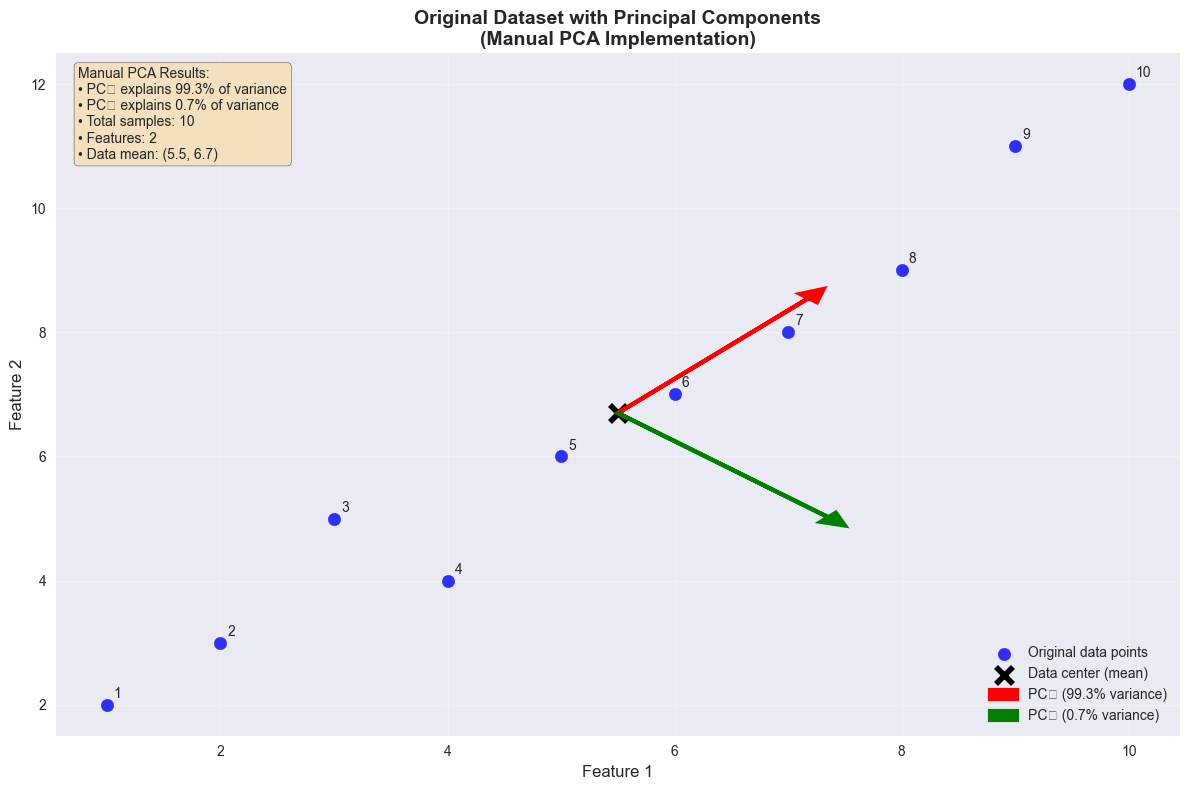

In [20]:
# Final visualization
plt.figure(figsize=(12, 8))

# Plot original data with principal components
plt.scatter(X[:, 0], X[:, 1], alpha=0.8, color='blue', s=80, label='Original data points')

# Mark the center (mean)
plt.scatter(means_manual[0], means_manual[1], color='black', s=150, marker='x', linewidths=4, label='Data center (mean)')

# Draw principal component vectors from the center
center = means_manual
scale = 2.5

# PC1 arrow
plt.arrow(center[0], center[1], 
          eigenvectors_sorted[0,0]*scale, eigenvectors_sorted[1,0]*scale,
          head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=3, 
          label=f'PC₁ ({explained_variance_ratio[0]*100:.1f}% variance)')

# PC2 arrow
plt.arrow(center[0], center[1], 
          eigenvectors_sorted[0,1]*scale, eigenvectors_sorted[1,1]*scale,
          head_width=0.2, head_length=0.2, fc='green', ec='green', linewidth=3,
          label=f'PC₂ ({explained_variance_ratio[1]*100:.1f}% variance)')

# Add sample numbers
for i, (x, y) in enumerate(X):
    plt.annotate(f'{i+1}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Original Dataset with Principal Components\n(Manual PCA Implementation)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Add text box with key information
info_text = f"""Manual PCA Results:
• PC₁ explains {explained_variance_ratio[0]*100:.1f}% of variance
• PC₂ explains {explained_variance_ratio[1]*100:.1f}% of variance
• Total samples: {n_samples}
• Features: {n_features}
• Data mean: ({means_manual[0]:.1f}, {means_manual[1]:.1f})"""

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

